In [45]:
from lib.utilities import *
import matplotlib.pyplot as plt


In [46]:
datadir = "./tsm_targets/05-25-22/2-2" # All files in this directory + subdirectories are loaded
#datadir = "./tsm_targets" # All files in this directory + subdirectories are loaded
#datadir = "C:/Turbo-SM/SMDATA/Untitled"
datadir = "C:/Turbo-SM/SMDATA/John/05-31-22"
selected_filenames = ["Untitled014", "Untitled015", "Untitled016", "Untitled017", "Untitled018",
                     "Untitled019", "Untitled020", "Untitled021", "Untitled022", "Untitled023"] # focus for subsequent analysis
combine_trials = False # whether all the selected files should be treated as trials to combine into single ZDA file
#selected_filename = "OMP25-Cerulean3-cell4003"
file_type = '.tsm'
camera_program = 4

In [47]:
cam_settings = CameraSettings().get_program_settings(camera_program)
print(cam_settings)

t_cropping = [0, -1]  # to handle artifacts
binning = int(cam_settings['height'] / 80)  # recommended binning, adjust as desired

{'interval_between_samples': 0.5, 'width': 512, 'height': 160, 'camera_program': 4, 'cropping': [176, 336]}


In [48]:
# Load data
data_loader = DataLoader()
if file_type == '.tsm':
    selected_filename = None  # set to a filename if there's only one you want to load, to avoid processing everything
    data_loader.load_all_tsm(data_dir=datadir, file_only=selected_filename)
    
print(data_loader.get_n_files_loaded(), "files loaded.")

Untitled014.tbn
Untitled014.tsm
C:/Turbo-SM/SMDATA/John/05-31-22/Untitled014.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
Untitled015.tbn
Untitled015.tsm
C:/Turbo-SM/SMDATA/John/05-31-22/Untitled015.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
Untitled016.tbn
Untitled016.tsm
C:/Turbo-SM/SMDATA/John/05-31-22/Untitled016.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 

In [49]:
# Select data of interest        
selected_datasets = [data_loader.select_data_by_keyword(fn) for fn in selected_filenames]

# binning and cropping
for i in range(len(selected_datasets)):
    sd = selected_datasets[i]
    if sd is None:
        print("Dataset not found:", selected_filenames[i])
    sd.clip_data(y_range=cam_settings['cropping'], t_range=t_cropping)
    sd.bin_data(binning=binning)

# load data
datasets = [{'filename': selected_filenames[i],
             'raw_data': selected_datasets[i].get_data(),
             'meta': selected_datasets[i].get_meta(),
             'rli': selected_datasets[i].get_rli(),
             'fp_data': selected_datasets[i].fp_data}
             for i in range(len(selected_datasets))]

{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_wid

(1, 199, 80, 80)


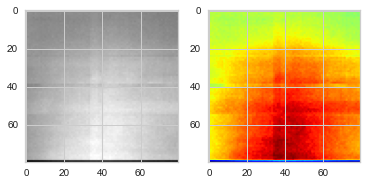

(1, 199, 80, 80)


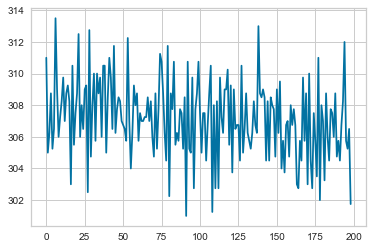

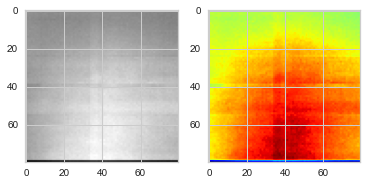

(1, 199, 80, 80)


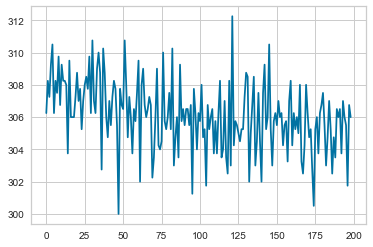

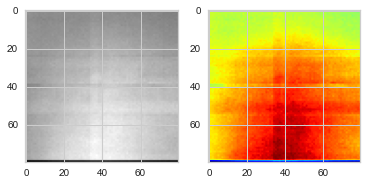

(1, 199, 80, 80)


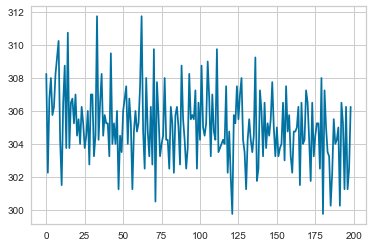

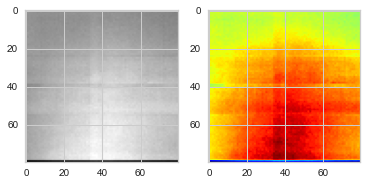

(1, 199, 80, 80)


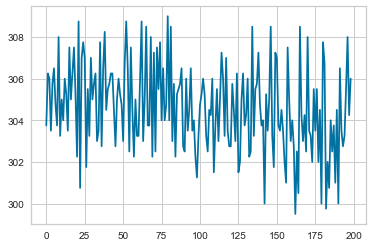

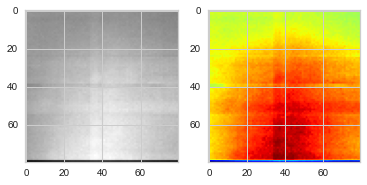

(1, 199, 80, 80)


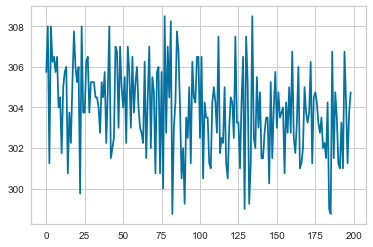

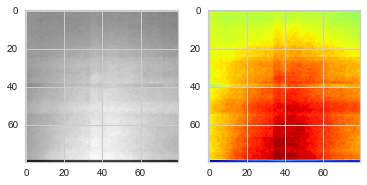

(1, 199, 80, 80)


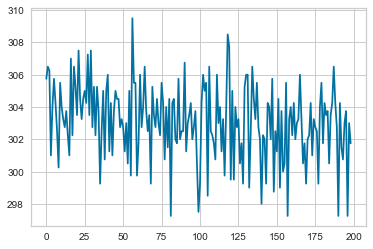

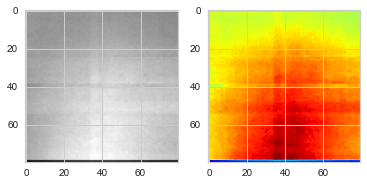

(1, 199, 80, 80)


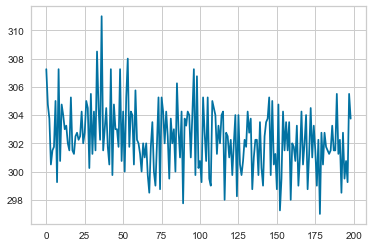

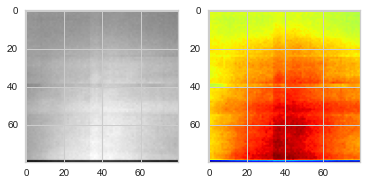

(1, 199, 80, 80)


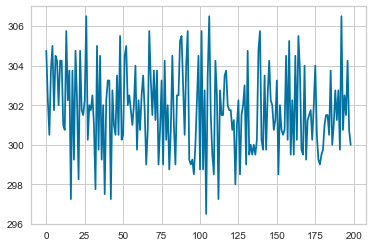

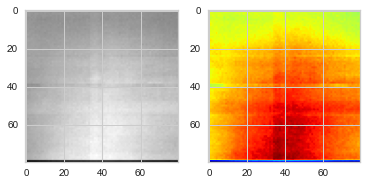

(1, 199, 80, 80)


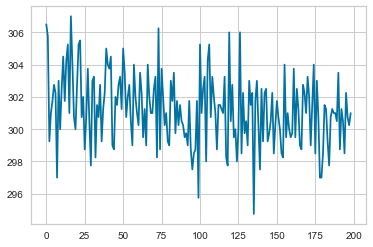

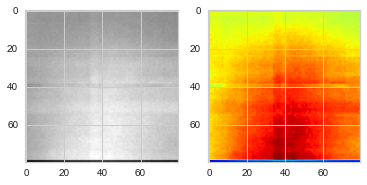

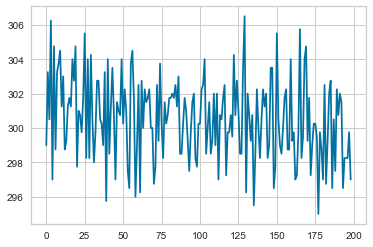

In [50]:
# if we're just one off, auto-correct for the user
for data in datasets:
    if data['raw_data'].shape[2] - data['raw_data'].shape[3] == 1:
        data['raw_data'] = raw_data[:, :, :-1, :]
    elif data['raw_data'].shape[3] - data['raw_data'].shape[2] == 1:
        data['raw_data'] = data['raw_data'][:, :, :, :-1]
    print(data['raw_data'].shape)

    # view frames
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(data['raw_data'][0,0,:,:],cmap='gray')
    axes[1].imshow(data['raw_data'][0,-1,:,:],cmap='jet')
    plt.show()

    data['rli_high_cp'] = np.copy(data['raw_data'][0,0,:,:]).astype(np.uint16)
    plt.subplots()
    plt.plot(data['raw_data'][0,:,0,0])

    # final check 
    if data['raw_data'].shape[2] != data['raw_data'].shape[3]:
        raise Exception("PhotoZ will not work with non-square array! Adjust cropping and/or binning")

In [51]:
# Fill in missing metadata as needed
for data in datasets:
    meta = data['meta']
    raw_data = data['raw_data']
    rli = data['rli']
    
    data['meta']['version'] = 5
    data['meta']['slice_number'] = 5
    data['meta']['location_number'] = 5
    data['meta']['record_number'] = 5
    data['meta']['camera_program'] = cam_settings['camera_program']

    data['meta']['interval_between_trials'] = 1
    data['meta']['acquisition_gain'] = 1
    data['meta']['time_RecControl'] = 5

    data['meta']['reset_onset'] = 1
    data['meta']['reset_duration'] = 5
    data['meta']['shutter_onset'] = 5
    data['meta']['shutter_duration'] = 5

    data['meta']['stimulation1_onset'] = 20
    data['meta']['stimulation1_duration'] = 1
    data['meta']['stimulation2_onset'] = 0
    data['meta']['stimulation2_duration'] = 0

    data['meta']['acquisition_onset'] = 1
    data['meta']['interval_between_samples'] = cam_settings['interval_between_samples']

    data['meta']['raw_width'] = raw_data.shape[2]
    data['meta']['raw_height'] = raw_data.shape[3]
    data['meta']['points_per_trace'] = raw_data.shape[1]
    data['meta']['number_of_trials'] = raw_data.shape[0]
    data['meta']['num_fp_pts'] = 8
    num_diodes = int(meta['raw_width'] * meta['raw_height'] + meta['num_fp_pts'])
    data['rli'] = {}
    data['rli']['rli_low'] = np.zeros((num_diodes), dtype = np.uint16)
    data['rli']['rli_high'] = np.zeros((num_diodes), dtype = np.uint16) 
    data['rli']['rli_high'][:meta['raw_width'] * meta['raw_height']] = data['rli_high_cp'].reshape(-1)
    data['rli']['rli_max'] = np.ones((num_diodes), dtype = np.uint16)


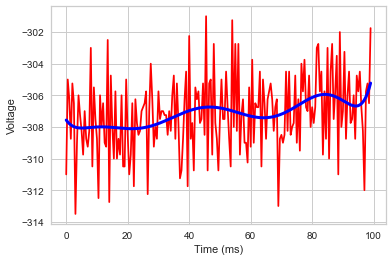

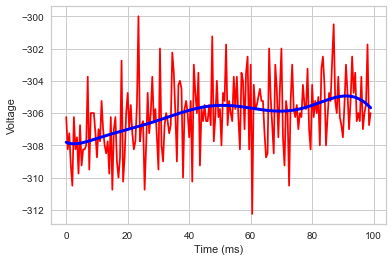

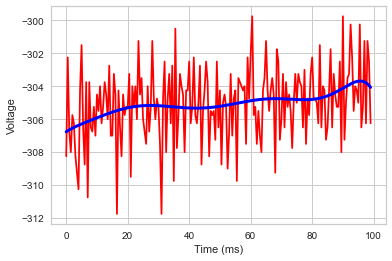

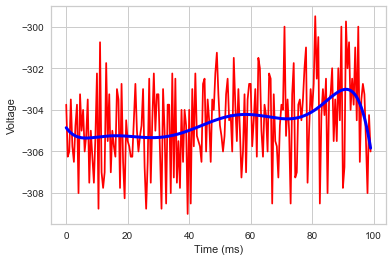

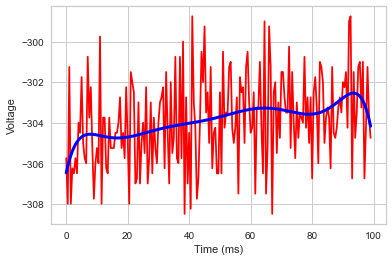

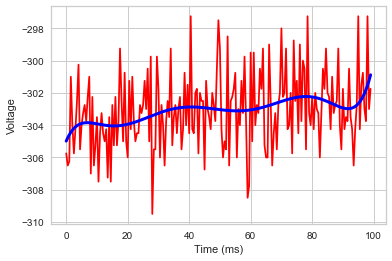

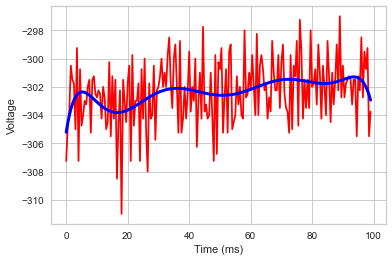

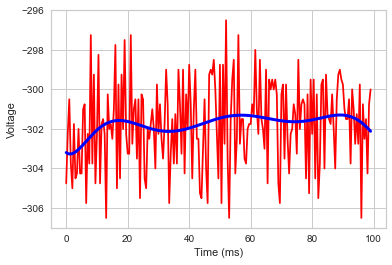

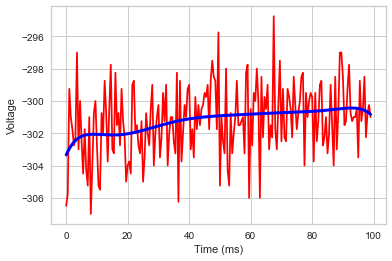

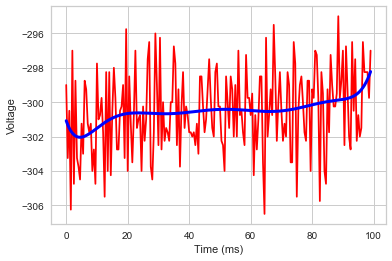

In [52]:
# Run this cell at most once
for data in datasets:
    
    # Apply baseline correction here. Because PhotoZ chokes on baseline correcting TurboSM data
    tr = Tracer()
    #data inversing
    data['raw_data'] = -data['raw_data']

    # Need to subtract off the low-frequency voltage drift. First-order correction
    tr.correct_background(data['meta'], data['raw_data'])
    #plt.subplots() # finalize plot 

(1, 199, 80, 80)


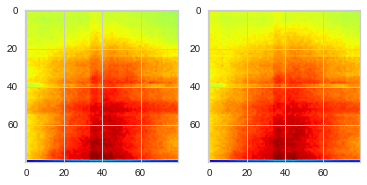

(1, 199, 80, 80)


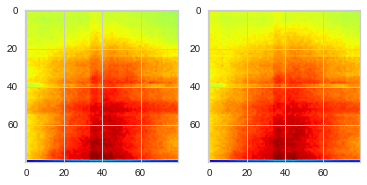

(1, 199, 80, 80)


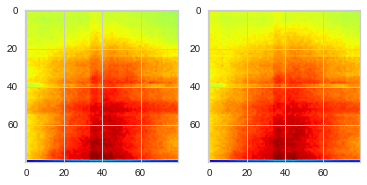

(1, 199, 80, 80)


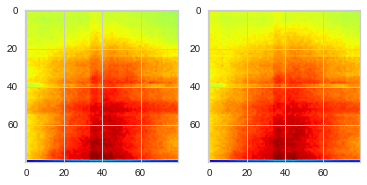

(1, 199, 80, 80)


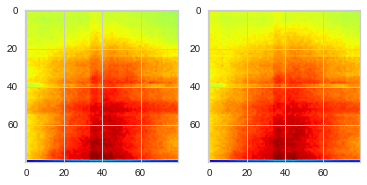

(1, 199, 80, 80)


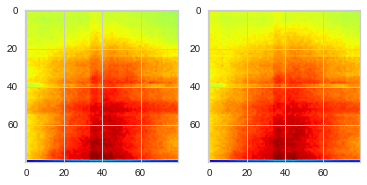

(1, 199, 80, 80)


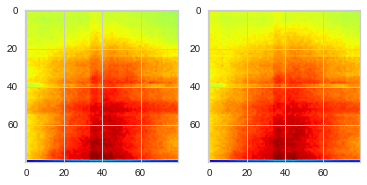

(1, 199, 80, 80)


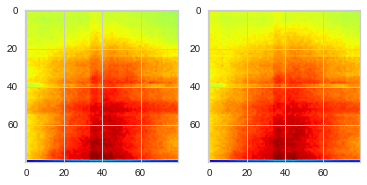

(1, 199, 80, 80)


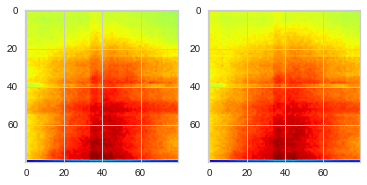

(1, 199, 80, 80)


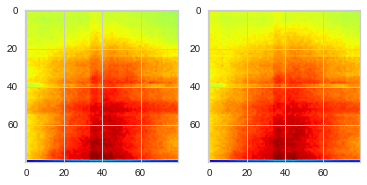

In [53]:
for data in datasets:

    # normalize raw data to 12-bit range
    data['fp_data'] = normalize_bit_range(data['fp_data'])
    data['raw_data'] = normalize_bit_range(data['raw_data'])

    # view frames
    fig, axes = plt.subplots(1, 2)
    print(data['raw_data'].shape)
    axes[0].imshow(raw_data[0,0,:,:],cmap='jet')
    axes[1].imshow(raw_data[0,-1,:,:],cmap='jet')
    plt.show()


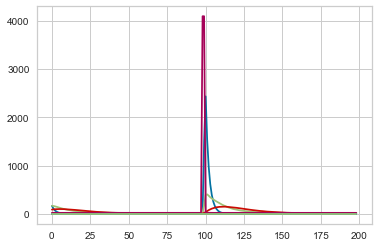

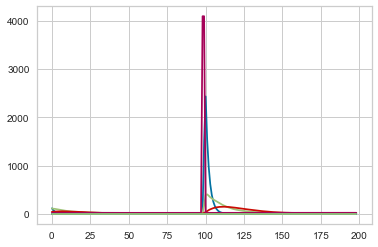

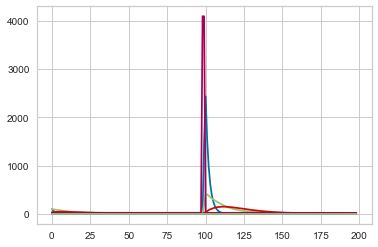

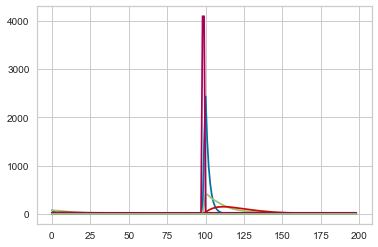

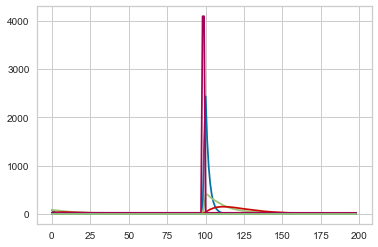

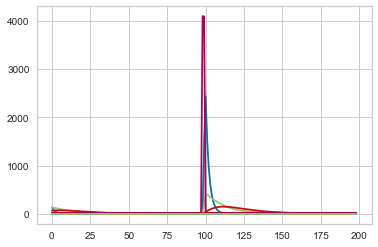

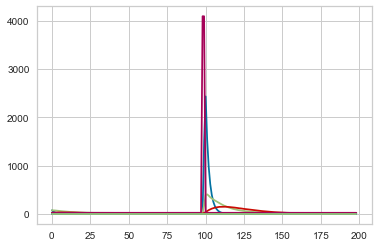

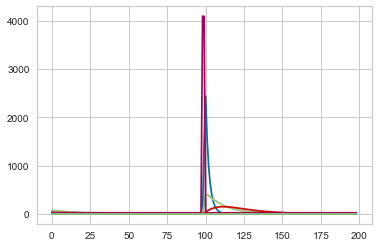

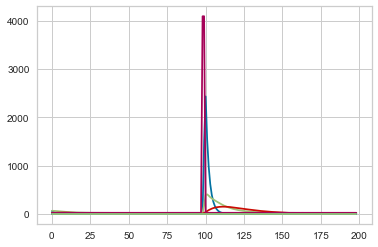

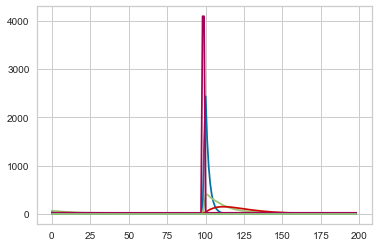

In [54]:
# resize FP data
for data in datasets:
    meta = data['meta']
    fp_data = data['fp_data']
    
    fp_data_final = np.zeros((fp_data.shape[0], meta['num_fp_pts']))
    fp_data_final[:, :fp_data.shape[1]] = fp_data[:, :]
    data['fp_data'] = np.swapaxes(fp_data_final, 1, 0)

    fig, ax = plt.subplots()
    ax.plot(fp_data_final[t_cropping[0]:t_cropping[1], :])

In [55]:
# Write data
for data in datasets:
    meta = data['meta']
    raw_data = data['raw_data']
    rli = data['rli']
    fp_data = data['fp_data']
    zda_writer = ZDA_Writer()
    zda_writer.write_zda_to_file(raw_data, meta, data['filename'] + ".zda", rli, fp_data[:, t_cropping[0]:t_cropping[1]])
    print("Written to " + data['filename'] + ".zda")

Not all DLL search paths added.
Written to Untitled014.zda
Not all DLL search paths added.
Written to Untitled015.zda
Not all DLL search paths added.
Written to Untitled016.zda
Not all DLL search paths added.
Written to Untitled017.zda
Not all DLL search paths added.
Written to Untitled018.zda
Not all DLL search paths added.
Written to Untitled019.zda
Not all DLL search paths added.
Written to Untitled020.zda
Not all DLL search paths added.
Written to Untitled021.zda
Not all DLL search paths added.
Written to Untitled022.zda
Not all DLL search paths added.
Written to Untitled023.zda
